In [1]:
# Import all necessary libraries.
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from IPython.display import Image  
from six import StringIO  
import pydot
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc, classification_report
import seaborn as sns

In [2]:
seed = 6
np.random.seed(seed)

In [3]:
def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 500)
    x2s = np.linspace(axes[2], axes[3], 500)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=14)
        plt.ylabel(r"$x_2$", fontsize=14, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

### Gerando a base de dados.

Geramos duas classes que são linearmente separáveis.

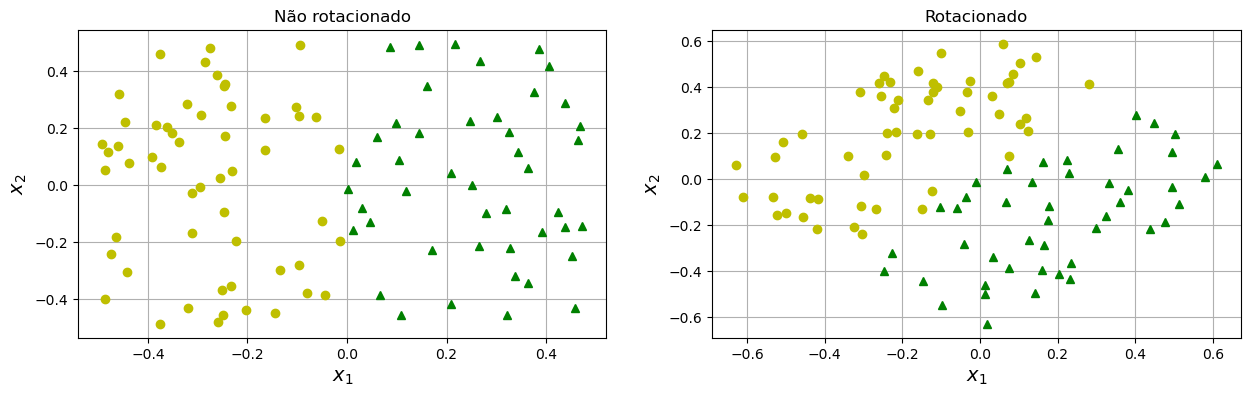

In [4]:
Xs = np.random.rand(100, 2) - 0.5
ys = (Xs[:, 0] > 0).astype(np.float32) * 2

# Rotation by 45 degrees.
angle = np.pi / 4
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xsr = Xs.dot(rotation_matrix)

plt.figure(figsize=(15, 4))
plt.subplot(121)
plt.title('Não rotacionado')
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "yo")
plt.plot(Xs[:, 0][ys==2], Xs[:, 1][ys==2], "g^")
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.grid()

plt.subplot(122)
plt.title('Rotacionado')
plt.plot(Xsr[:, 0][ys==0], Xsr[:, 1][ys==0], "yo")
plt.plot(Xsr[:, 0][ys==2], Xsr[:, 1][ys==2], "g^")
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.grid()

plt.show()

### Treinando modelos.

Comparando a classficação feita por uma árvore de decisão e um regressor logístico em cima de dados rotacionados de 45 graus.

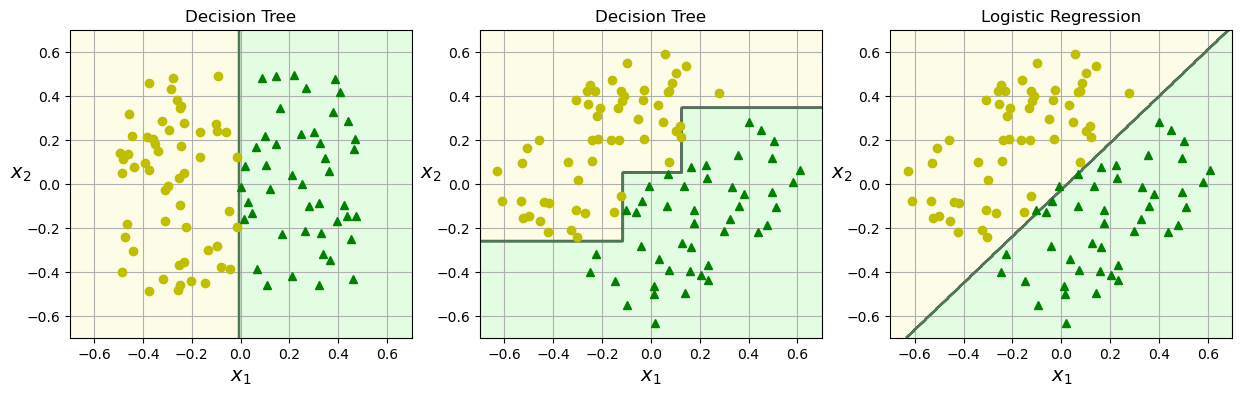

In [5]:
tree_clf_s = DecisionTreeClassifier(random_state=42)
tree_clf_s.fit(Xs, ys)

y_pred_s = tree_clf_s.predict(Xs)

tree_clf_sr = DecisionTreeClassifier(random_state=42)
tree_clf_sr.fit(Xsr, ys)

y_pred_sr = tree_clf_sr.predict(Xsr)

lr_clf = LogisticRegression(random_state=42)
lr_clf.fit(Xsr, ys)

y_pred_lr_sr = lr_clf.predict(Xsr)

plt.figure(figsize=(15, 4))
plt.subplot(131)
plt.title('Decision Tree')
plot_decision_boundary(tree_clf_s, Xs, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.grid()
plt.subplot(132)
plt.title('Decision Tree')
plot_decision_boundary(tree_clf_sr, Xsr, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.grid()
plt.subplot(133)
plt.title('Logistic Regression')
plot_decision_boundary(lr_clf, Xsr, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.grid()

plt.show()

In [6]:
accuracy_s = accuracy_score(ys, y_pred_s)

print('accuracy DT: ', accuracy_s)

accuracy_sr = accuracy_score(ys, y_pred_sr)

print('accuracy DT rotated: ', accuracy_sr)

accuracy_lr_sr = accuracy_score(ys, y_pred_lr_sr)

print('accuracy LR rotated: ', accuracy_lr_sr)

accuracy DT:  1.0
accuracy DT rotated:  1.0
accuracy LR rotated:  0.98


## Observações

+ As figuras acima mostram um conjunto de classes linearmente separáveis: 
    + À esquerda, uma árvore de decisão pode dividi-lo facilmente, um único nó já é suficiente para a separação.
        + Fronteira de separação simples.
    
    + Enquanto ao centro, depois que o conjunto de dados é rotacionado de 45°, a fronteira da decisão parece desnecessariamente complicada (complexa). São necessários vários nós para se obter a separação das classes.
        + Fronteira de separação tem complexidade maior do que a necessária (i.e., sobreajuste). Não generaliza bem.
        
    + Já a figura à direita mostra a fronteira de decisão para um classificador utilizando regressão logística. Ele encontra um separador linear que irá generalizar bem.


+ Embora ambas as árvores de decisão classifiquem perfeitamente o conjunto de treinamento, é muito provável que o modelo ao centro não generalize bem. 


+ Uma maneira de minimizar esse problema é usar Análise de Componentes Principais (PCA), que rotaciona e dimensiona linearmente a matriz de atributos, resultando em uma melhor orientação dos dados de treinamento.


<img src="../../../figures/pca.png" width="600px">